In [ ]:
!pip install networkx
!pip install torch
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv torch_geometric -f https://data.pyg.org/whl/torch-1.13.0+cpu.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cpu.html
  Using cached https://data.pyg.org/whl/torch-1.13.0%2Bcpu/torch_scatter-2.1.1%2Bpt113cpu-cp39-cp39-linux_x86_64.whl (485 kB)


In [ ]:
!pip uninstall torch-scatter

Found existing installation: torch-scatter 2.1.1+pt113cpu
Uninstalling torch-scatter-2.1.1+pt113cpu:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/torch_scatter-2.1.1+pt113cpu.dist-info/*
    /usr/local/lib/python3.9/dist-packages/torch_scatter/*
Proceed (Y/n)? y
  Successfully uninstalled torch-scatter-2.1.1+pt113cpu


In [9]:
import pandas as pd
import openpyxl
import numpy as np
import networkx as nx
from torch_geometric.data import Data 
import pickle
import itertools
import matplotlib.pyplot as plt

OSError: ignored

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
with open('/content/gdrive/MyDrive/Colab Notebooks/weave/KnowledgeBase/edges_base.pickle', 'rb') as file:
  edges_base = pickle.load(file)

concat_companies = pd.read_excel("/content/gdrive/MyDrive/Colab Notebooks/weave/Datasets/concat_companies.xlsx")

Create Graph

In [ ]:
concat_companies.head()
# note that this dataframe has repeated company names because the previous 
# contributor considered different funding rounds for each company

,org_uuid,org_name,category_list,labels,investors_names,investors_uuids
0,a2323b6c-29b9-4750-905c-cdcbd9ce92b8,10X Banking,"Financial Services,Lending and Investments,Sof...",1,"Oliver Wyman,Ping An Global Voyager","88213ccc-71f8-1024-72cf-44e863af4993,c8cb5641-..."
1,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,10X Genomics,"Biotechnology,Health Care,Science and Engineering",1,Silicon Valley Bank,4eee5e60-3b06-6fe8-cc2c-29119a96051d
2,cf3b00cf-ffbf-0e4f-6427-a60e5060de39,10X Genomics,"Biotechnology,Health Care,Science and Engineering",1,Silicon Valley Bank,4eee5e60-3b06-6fe8-cc2c-29119a96051d
3,0680987f-23cd-4fa5-850c-38326fffaa36,"111, Inc.",Health Care,1,Ivy Capital,f8eed790-8c07-4e49-c873-0f7245e393ff
4,a79a6ae8-3c74-0db7-7e6b-b4f7662d37e8,17zuoye,"Education,Internet Services,Software",1,Shunwei Capital,24540ba2-35b0-a757-f75e-87565c50692e


In [ ]:
concat_companies["labels"][0]

1

In [ ]:
G = nx.Graph()

# Add nodes with labels and features
for org_index,org_uuid in enumerate(concat_companies['org_uuid']):
  if not G.has_node(org_uuid): #note that org_uuid migght repeat for each funding round
    # Add nodes and labels
    G.add_node(org_uuid, label=concat_companies["labels"][org_index])
    # add node feature

print(f"Number of nodes is {G.number_of_nodes()}")


Number of nodes is 4083


In [ ]:
# Add edges
for investor in edges_base:
  org_list = edges_base[investor]

  # Ignore investor with 1 investment
  if len(org_list) <= 1:
    continue

  edges = itertools.combinations(org_list,r=2)
  G.add_edges_from(list(edges))


In [ ]:
len(G.edges('3dbe5fc4-29bd-b4f7-747f-efcd6c2983c1'))

7

In [ ]:
def graph_visualisation(Graph):
  # Add colour to nodes for visualisation
  colours = []
  for node in Graph:
    if Graph.nodes[node]['label'] == 1:
      colours.append("red")
    else:
      colours.append("blue")
  # Draw
  plt.figure(figsize=(50,50))
  nx.draw(G, node_color=colours)

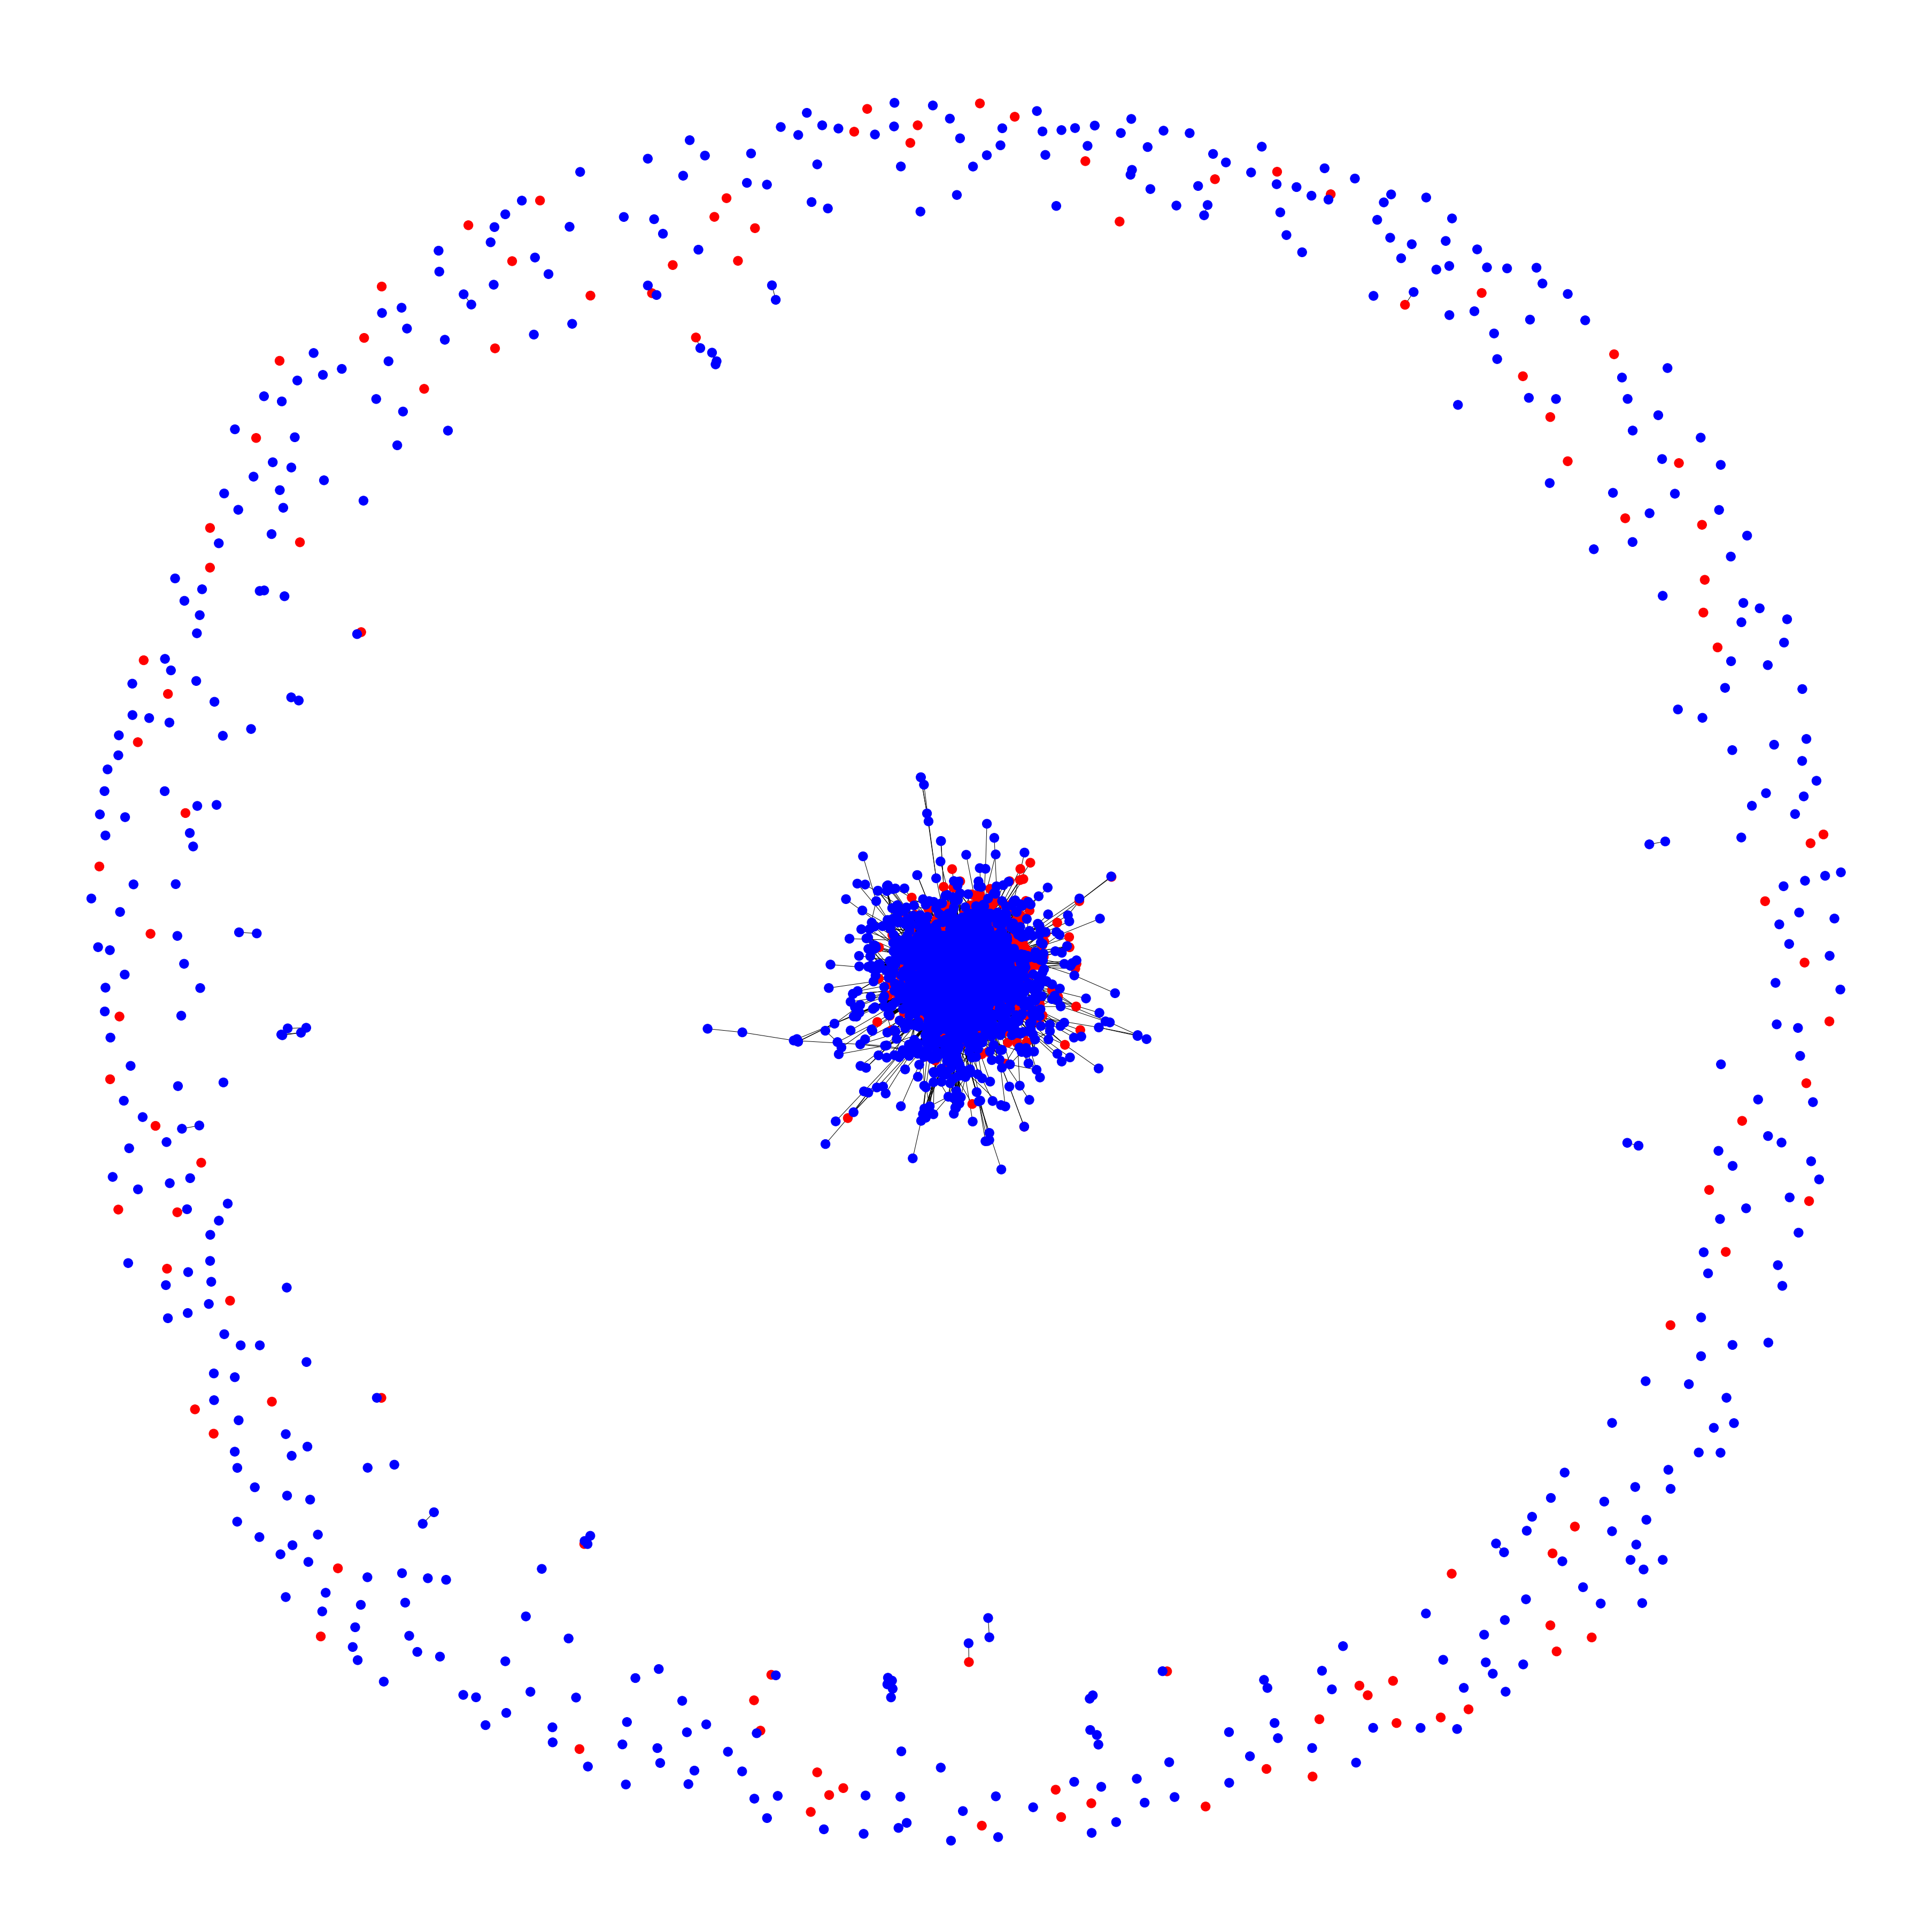

In [ ]:
# Visualise initial graph
graph_visualisation(G)

In [ ]:
with open('/content/gdrive/MyDrive/Colab Notebooks/weave/KnowledgeBase/graph_floating.pickle', 'wb') as file:
  pickle.dump(G, file)

In [ ]:
# Remove floating companies: iterate until no floating companies left
def remove_floating(Graph):
  no_floating = 1
  while no_floating != 0:
    # Find nodes with few edges to prevent bottleneck
    floating_companies = []
    for node in Graph:
      if Graph.degree[node] <= 3:
        floating_companies.append(node)
    print(f'Number of floating companies is now {len(floating_companies)}, {len(Graph.nodes)} companies in total.')

    # Remove floating companies
    for node in floating_companies:
      Graph.remove_node(node)
    
    # Update number of floating companies
    no_floating = len(floating_companies)

In [ ]:
remove_floating(G)

Number of floating companies is now 1120, 4083 companies in total.
Number of floating companies is now 49, 2963 companies in total.
Number of floating companies is now 8, 2914 companies in total.
Number of floating companies is now 3, 2906 companies in total.
Number of floating companies is now 0, 2903 companies in total.


In [ ]:
# Visualise graphing without floating nodes
graph_visualisation(G)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
with open('/content/gdrive/MyDrive/Colab Notebooks/weave/KnowledgeBase/graph_notfloat.pickle', 'wb') as file:
  pickle.dump(G, file)